## Import  Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd   ## Data Prepocessing
import numpy as np    ## Linear Algebra

## Data Visualizations

import matplotlib.pyplot as plt 
import seaborn as sns              

## Load Data

In [3]:
data=pd.read_csv("M:/DataSets/Social_Network_Ads.csv")

## Data Pre-Processing

In [4]:
## look at data
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
data.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [6]:
## know about datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


We need to scale only age and Estimated salary. As Purchased is a discreet variable

In [7]:
## descriptive statistics
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


 Mean and median are nearly equal . so we can use mean to fill if there are any null values

In [8]:
## check for duplicates
# ----->  data[data.duplicated()]
data.duplicated().sum()

33

Data contains duplicates. Drop them

In [9]:
df_no_dup=data.drop_duplicates()

In [10]:
## check for null values
df_no_dup.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
## check for relation among the variables
df_no_dup.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.167771,0.626164
EstimatedSalary,0.167771,1.000000,0.375624
Purchased,0.626164,0.375624,1.000000


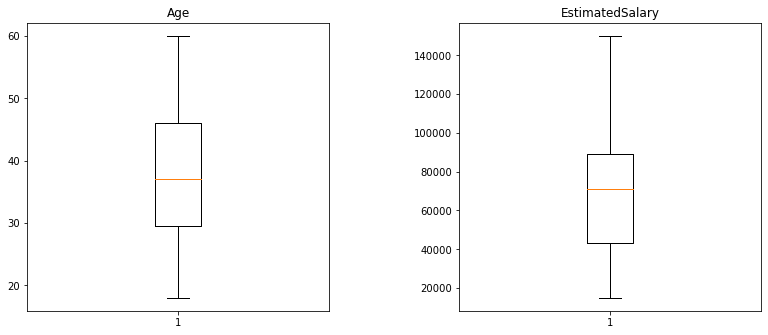

In [12]:
## check for outliers
fig = plt.figure()
ax1 = fig.add_axes([0,0,.7,1])
ax2 = fig.add_axes([1, 0, .7, 1])


ax1.boxplot(df_no_dup['Age'])
ax1.set_title("Age")

ax2.boxplot(df_no_dup['EstimatedSalary'])
ax2.set_title("EstimatedSalary")

plt.show()

Look's no outliers in the data

<AxesSubplot:xlabel='Age', ylabel='Density'>

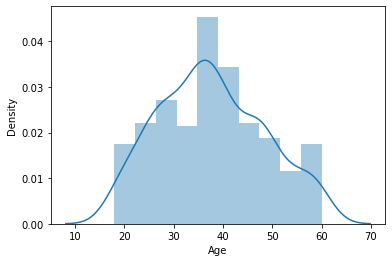

In [13]:
## look at distribution
sns.distplot(df_no_dup.Age)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

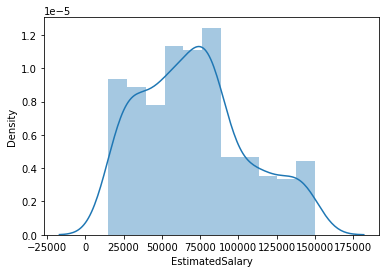

In [14]:
sns.distplot(df_no_dup.EstimatedSalary)

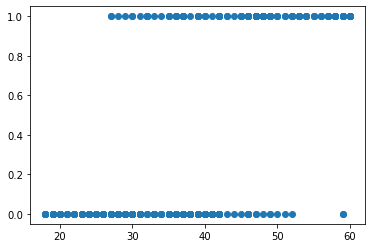

In [15]:
## plot Age vs 'Purchased'
plt.scatter(df_no_dup['Age'], df_no_dup['Purchased'])
plt.show()

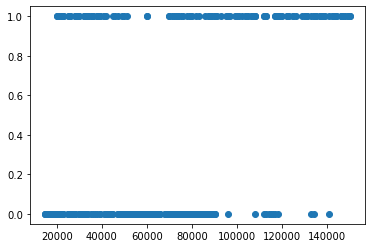

In [16]:
## plot EstomatedSalary vs Purchased
plt.scatter(df_no_dup['EstimatedSalary'], df_no_dup['Purchased'])
plt.show()

    1.Shows for every salary range purchases are happening and not happening.
    2.And Age will not sloely determines the Purchase

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>

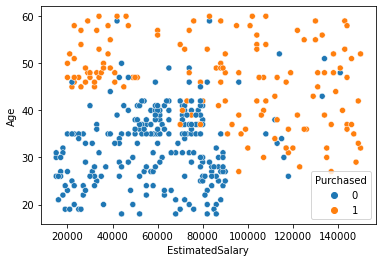

In [17]:
## plt EstimatedSalary vs Age hue :Purchased
sns.scatterplot(x='EstimatedSalary',y='Age',hue='Purchased',data=df_no_dup)

Need to Find a Boundary which sepates Purchased yes or no

## import libraries regarding Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression    ## model creation
from sklearn.preprocessing import StandardScaler       ## standardizing 
from sklearn.model_selection import train_test_split   ## for splitting the data

## metrics for LR

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve   ## TPR VS FPR
from sklearn.metrics import roc_auc_score ## area under the curve

In [19]:
## separate target varibles and independent variables

x=df_no_dup.iloc[:,:-1].values
y=df_no_dup.iloc[:,-1].values

In [20]:
## Split the data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle=True,random_state=2)
## x_test.shape

In [21]:
## scale the data

sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [22]:
## model creation

model=LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)

In [23]:
##metrics

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[54  5]
 [13 20]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        59
           1       0.80      0.61      0.69        33

    accuracy                           0.80        92
   macro avg       0.80      0.76      0.77        92
weighted avg       0.80      0.80      0.80        92



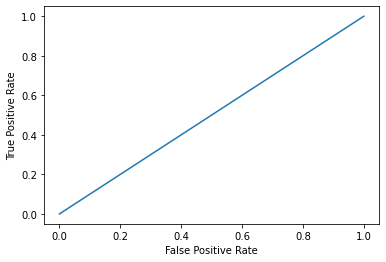

0.5


In [24]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _  =  roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = roc_auc_score(y_test, y_pred_proba)
print(auc)

The more the curve touches the top-left part the better the model  delivers

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


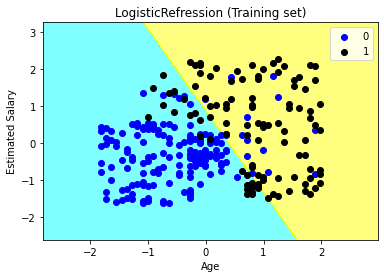

In [25]:
## lets look at the descison boundary once
from matplotlib.colors import ListedColormap
X_Set, Y_Set = x_train_scaled,y_train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1,X2,model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('cyan', 'yellow')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('blue', 'black'))(i), label = j)
plt.title('LogisticRefression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


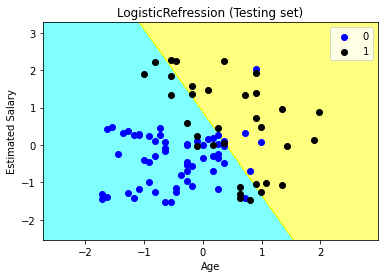

In [26]:
## lets look at the descison boundary once
from matplotlib.colors import ListedColormap
X_Set, Y_Set = x_test_scaled,y_test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1,X2,model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('cyan', 'yellow')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('blue', 'black'))(i), label = j)
plt.title('LogisticRefression (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [27]:
## coeffients and intercepts of the model.

print(model.coef_)
print(model.intercept_)

[[2.31053863 1.04244281]]
[-0.91552089]


we need to fine tune these varaibles to get better acuuracy